In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [55]:
df = pd.read_csv('merged.csv', index_col = [0])

In [56]:
df.head()

,FlightDate,Quarter,Year,Month,Origin,Dest,DayofMonth,DepTime,DepDel15,CRSDepTime,...,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,date,time,airport_code
0,2016-01-01,1,2016,1,SEA,JFK,1,741.0,0.0,745,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
1,2016-01-01,1,2016,1,SEA,SFO,1,759.0,1.0,724,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
2,2016-01-01,1,2016,1,SEA,LAX,1,705.0,0.0,705,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
3,2016-01-01,1,2016,1,SEA,IAH,1,740.0,0.0,738,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
4,2016-01-01,1,2016,1,SEA,ATL,1,742.0,0.0,745,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA


In [57]:
df.columns

Index(['FlightDate', 'Quarter', 'Year', 'Month', 'Origin', 'Dest',
       'DayofMonth', 'DepTime', 'DepDel15', 'CRSDepTime', 'DepDelayMinutes',
       'OriginAirportID', 'DestAirportID', 'ArrTime', 'CRSArrTime', 'ArrDel15',
       'ArrDelayMinutes', 'rounded_time', 'windspeedKmph', 'winddirDegree',
       'weatherCode', 'precipMM', 'visibility', 'pressure', 'cloudcover',
       'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF', 'humidity', 'date',
       'time', 'airport_code'],
      dtype='object')

In [58]:
df = df.drop(columns = ['airport_code','rounded_time','date','FlightDate','OriginAirportID', 'DestAirportID','WindChillF', 'CRSArrTime', 'ArrTime', 'ArrDel15', 'time', 'Quarter'])

In [59]:
df = df[df['ArrDelayMinutes'] != 0]

In [60]:
df = df.reset_index()

In [61]:
df = df.drop('index', axis = 1)

In [62]:
df

,Year,Month,Origin,Dest,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,ArrDelayMinutes,...,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,humidity
0,2016,1,SEA,JFK,1,741.0,0.0,745,0.0,8.0,...,107,113,0.0,10,1030,0,23,8,34,66
1,2016,1,SEA,SFO,1,759.0,1.0,724,35.0,24.0,...,107,113,0.0,10,1030,0,23,8,34,66
2,2016,1,SEA,IAH,1,740.0,0.0,738,2.0,10.0,...,107,113,0.0,10,1030,0,23,8,34,66
3,2016,1,SEA,JFK,1,723.0,0.0,717,6.0,4.0,...,107,113,0.0,10,1030,0,23,8,34,66
4,2016,1,SEA,LAX,1,726.0,0.0,730,0.0,3.0,...,107,113,0.0,10,1030,0,23,8,34,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696289,2017,9,JFK,LAX,21,2358.0,1.0,2245,73.0,51.0,...,28,122,0.0,10,1015,96,64,26,72,75
696290,2017,9,MCO,JFK,22,2021.0,1.0,1954,27.0,18.0,...,66,116,0.6,9,1013,20,73,24,79,80
696291,2017,9,MCO,EWR,22,2240.0,1.0,2140,60.0,57.0,...,65,116,0.0,9,1013,19,73,23,78,84
696292,2017,9,MCO,JFK,24,1948.0,0.0,1954,0.0,38.0,...,45,113,0.0,10,1012,14,71,19,82,71


In [69]:
df['ArrDelayMinutes'].describe()

count    696294.000000
mean         37.701375
std          60.446632
min           1.000000
25%           7.000000
50%          17.000000
75%          44.000000
max        2142.000000
Name: ArrDelayMinutes, dtype: float64

In [63]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df["Origin"] = labelEncoder.fit_transform(df["Origin"])
df["Dest"] = labelEncoder.fit_transform(df["Dest"])

In [64]:
X = df.drop('ArrDelayMinutes', axis = 1)
y = df['ArrDelayMinutes']

In [84]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
mae_l = []
mse_l = []
rmse_l = []
rsquared_l = []
def print_results(ytest, ypred):
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    rmse = mse ** 0.5  
    r2 = r2_score(ytest, ypred)
    mae_l.append(mae)
    mse_l.append(mse)
    rmse_l.append(rmse)
    rsquared_l.append(r2)

    print("Results from sklearn.metrics:")
    print("MAE: ", mae)
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("R-Squared: ", r2)

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [85]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Linear Regression Results')
print_results(y_test, y_pred)

Linear Regression Results
Results from sklearn.metrics:
MAE:  10.619136341691227
MSE:  245.34873710585197
RMSE:  15.663611879316084
R-Squared:  0.9328889084779043


##### LR Result  Analysis
Upon comparing these metrics with information about the target variable, it appears that the Linear Regression model is delivering satisfactory performance. The target variable, "ArrDelayMinutes," possesses an average of 37.70 and spans from 1 to 2142. Within this context, the RMSE value of 15.66 and an R-squared value of 0.93 suggest that the model's predictions closely align with the actual values. 

In [86]:
et_reg = ExtraTreesRegressor(n_jobs = -1)
et_reg.fit(X_train, y_train)
y_pred = et_reg.predict(X_test)
print('Extra Tree Regressor Results')
print_results(y_test, y_pred)

Extra Tree Regressor Results
Results from sklearn.metrics:
MAE:  10.498906165475443
MSE:  231.83742287770056
RMSE:  15.226208420933315
R-Squared:  0.9365847051485758


In [87]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)
print('Decision Tree Regressor Results')
print_results(y_test, y_pred)

Decision Tree Regressor Results
Results from sklearn.metrics:
MAE:  14.69095069630282
MSE:  481.34720593233726
RMSE:  21.939626385431847
R-Squared:  0.8683354282875596


In [88]:
dt_reg = RandomForestRegressor(n_jobs = -1)
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)
print('Random Forest Regressor Results')
print_results(y_test, y_pred)

Random Forest Regressor Results
Results from sklearn.metrics:
MAE:  10.429570285334954
MSE:  228.60919380423053
RMSE:  15.119827836461317
R-Squared:  0.9374677338503313


In [89]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)
print('XGBoost Regressor Results')
print_results(y_test, y_pred)

XGBoost Regressor Results
Results from sklearn.metrics:
MAE:  9.965887204314496
MSE:  214.72912248469413
RMSE:  14.653638540809382
R-Squared:  0.9412643979279489


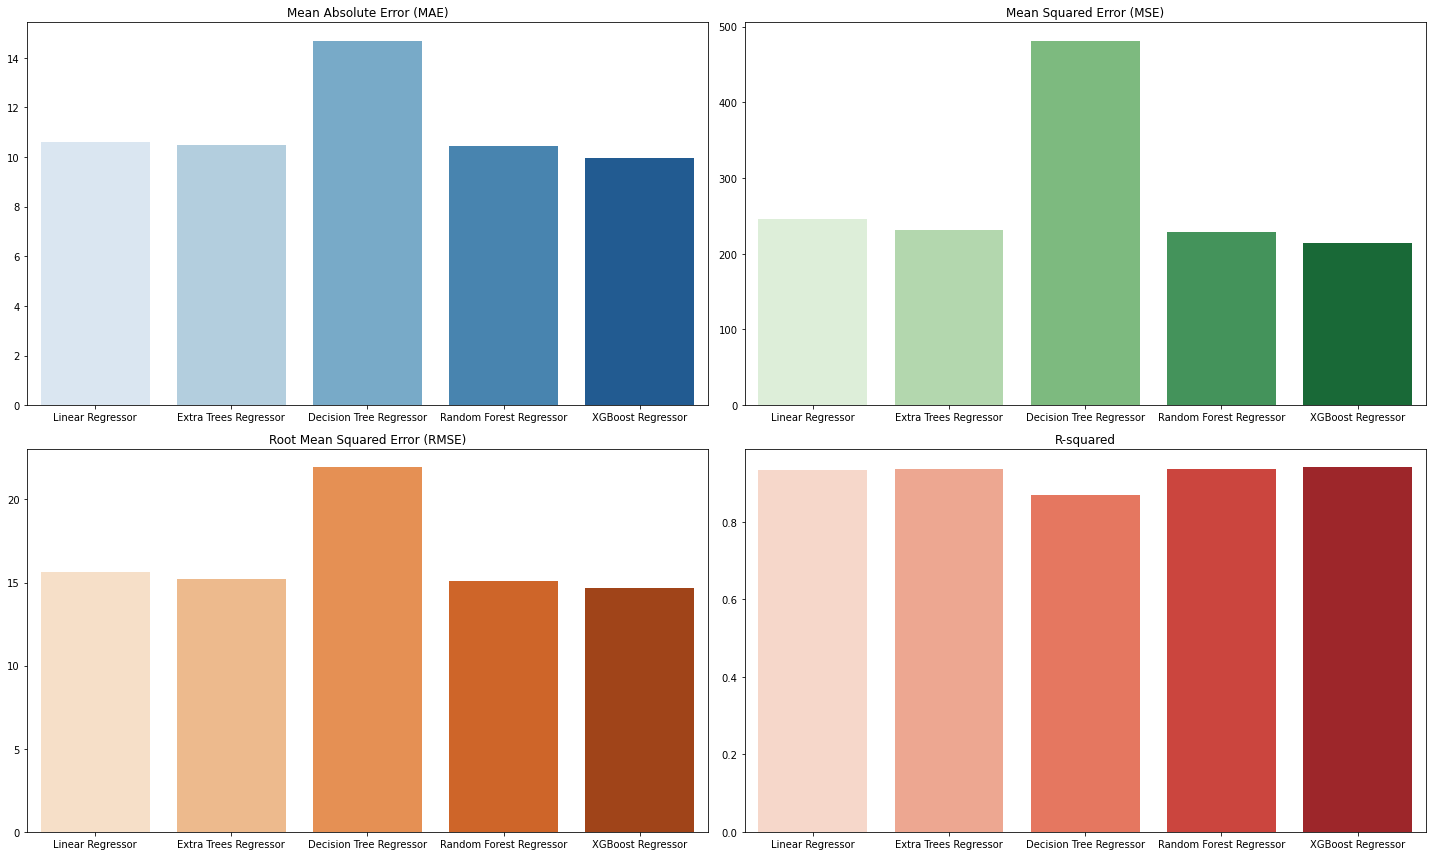

In [100]:
import matplotlib.pyplot as plt
model_names = ['Linear Regressor', 'Extra Trees Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGBoost Regressor']


fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 12))

sns.barplot(x = model_names, y = mae_l, palette = "Blues", ax = ax[0, 0])
ax[0, 0].set_title("Mean Absolute Error (MAE)")

sns.barplot(x = model_names, y = mse_l, palette = "Greens", ax = ax[0, 1])
ax[0, 1].set_title("Mean Squared Error (MSE)")

sns.barplot(x = model_names, y = rmse_l, palette = "Oranges", ax = ax[1, 0])
ax[1, 0].set_title("Root Mean Squared Error (RMSE)")

sns.barplot(x = model_names, y = rsquared_l, palette = "Reds", ax = ax[1, 1])
ax[1, 1].set_title("R-squared")

plt.tight_layout()

plt.show()
